# **Optimal Product Selection:**

Problem Source: F. S. Hillier and G. J. Lieberman, "Introduction to Mathematical Programming," 2nd Edition, McGraw-Hill Inc., New York, 1995.

**Problem Statement:**

The research and development division of a company has been developing four
possible new product lines. Management must now make a decision as to which of these four products actually will be produced and at what levels. Therefore, they have asked the OR department to formulate a mathematical programming model to find the most profitable product mix.

A substantial cost is associated with beginning the production of any product, as given in the first row of the following table. The marginal net revenue from each unit produced is given in the second row of the table:

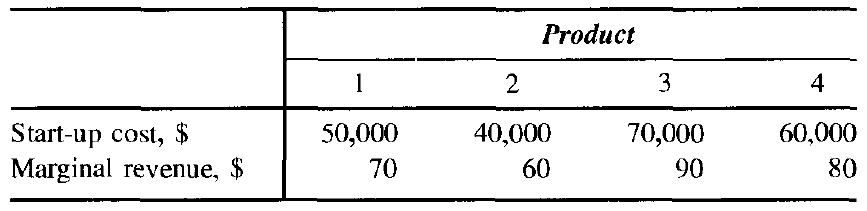

Let the continuous decision variables $x_1, x_2, x_3$, and $x_4$ be the production levels of products $1, 2, 3$, and $4$, respectively. Management has imposed the following policy constraints on these variables:

1. No more than two of the products can be produced.

2. Either product $3$ or $4$ can be produced only if either product $1$ or $2$ is produced.

3. Either $5x_1 + 3x_2 + 6x_3 + 4x_4 \leq 6000$

  or $4x_1 + 6x_2 + 3x_3 + 5x_4 \leq 6000$.

**Modeling:**

$x_{i} \qquad  i\in {1,2,3,4} \quad $   continuous variables for production level of each product

$y_{i} \qquad  i\in {1,2,3,4} \quad $   binary variables

$\\ $

$Objective\ Function:\\ $

$Max\ Z = 70x_{1}+60x_{2}+90x_{3}+80x_{4}-5000y_{1}-4000y_{2}-7000y_{3}-6000y_{4}$

$\\ $

$Constraints:\\ $


Production Limit Constraint: No more than two products can be produced:

$y_{1}+y_{2}+y_{3}+y_{4} \leq 2$

Dependency constraint: Either product 3 or 4 can be produced only if product 1 or 2 is produced:

$y_{3} \leq y_{1}+y_{2}$

$y_{4} \leq y_{1}+y_{2}$

Resource Constraints: Either one of the following resource constraints must hold:

$5x_1 + 3x_2 + 6x_3 + 4x_4 \leq 6000+My_{5}$

$4x_1 + 6x_2 + 3x_3 + 5x_4 \leq 6000+M(1-y_{5})$.

Production can only occur if the product is chosen:

$x_{1} \leq My_{1}$

$x_{2} \leq My_{2}$

$x_{3} \leq My_{3}$

$x_{4} \leq My_{4}$

Non-negativity and Binary Constraints:

$x_{1},x_{2},x_{3},x_{4} \geq 0$

$y_{1},y_{2},y_{3},y_{4},y_{5} \in {0,1}$


## Using Pulp Library

In [1]:
!pip install pulp
from pulp import *
import numpy as np
import pandas as pd

In [2]:
#Defining Variables

x = LpVariable.dicts('x', ((i) for i in range(1,5)), lowBound = 0, cat='Continuous')
y = LpVariable.dicts('y', ((i) for i in range(1,6)), cat='Binary')

In [3]:
#Defining Objective Function

model = LpProblem('model', LpMaximize)

model += 70*x[1]+60*x[2]+90*x[3]+80*x[4]-5000*y[1]-4000*y[2]-7000*y[3]-6000*y[4]

In [4]:
#Constraints

M = 1000000

#Production Limit Constraint: No more than two products can be produced:
model += y[1]+y[2]+y[3]+y[4] <= 2

#Dependency constraint: Either product 3 or 4 can be produced only if product 1 or 2 is produced:
model += y[3] <= y[1]+y[2]
model += y[4] <= y[1]+y[2]

#Resource Constraints: Either one of the following resource constraints must hold:
model += 5*x[1]+3*x[2]+6*x[3]+4*x[4] <= 6000 + M*y[5]
model += 4*x[1]+6*x[2]+3*x[3]+5*x[4] <= 6000 + M*(1-y[5])

#Production can only occur if the product is chosen:
model += x[1] <= M*y[1]
model += x[2] <= M*y[2]
model += x[3] <= M*y[3]
model += x[4] <= M*y[4]

In [5]:
#Model summary

model

model:
MAXIMIZE
70*x_1 + 60*x_2 + 90*x_3 + 80*x_4 + -5000*y_1 + -4000*y_2 + -7000*y_3 + -6000*y_4 + 0
SUBJECT TO
_C1: y_1 + y_2 + y_3 + y_4 <= 2

_C2: - y_1 - y_2 + y_3 <= 0

_C3: - y_1 - y_2 + y_4 <= 0

_C4: 5 x_1 + 3 x_2 + 6 x_3 + 4 x_4 - 1000000 y_5 <= 6000

_C5: 4 x_1 + 6 x_2 + 3 x_3 + 5 x_4 + 1000000 y_5 <= 1006000

_C6: x_1 - 1000000 y_1 <= 0

_C7: x_2 - 1000000 y_2 <= 0

_C8: x_3 - 1000000 y_3 <= 0

_C9: x_4 - 1000000 y_4 <= 0

VARIABLES
x_1 Continuous
x_2 Continuous
x_3 Continuous
x_4 Continuous
0 <= y_1 <= 1 Integer
0 <= y_2 <= 1 Integer
0 <= y_3 <= 1 Integer
0 <= y_4 <= 1 Integer
0 <= y_5 <= 1 Integer

In [6]:
#Solving model

model.solve()
print('Optimal Solution:', pulp.value(model.objective))

Optimal Solution: 169000.0


In [7]:
for variables in model.variables():
  print(f'{variables.name}:{variables.varValue}')

x_1:0.0
x_2:0.0
x_3:2000.0
x_4:0.0
y_1:0.0
y_2:1.0
y_3:1.0
y_4:0.0
y_5:1.0


In [8]:
VNames = []
for variables in model.variables():
  VNames.append(variables.name)

VValue = []
for variables in model.variables():
  VValue.append(np.round(variables.varValue, 2))

data = {'Variables': VNames, 'Value': VValue}
pd.DataFrame(data, index = range(1, len(VValue)+1))

,Variables,Value
1,x_1,0.0
2,x_2,0.0
3,x_3,2000.0
4,x_4,0.0
5,y_1,0.0
6,y_2,1.0
7,y_3,1.0
8,y_4,0.0
9,y_5,1.0


In [9]:
print('Current Status: ', LpStatus[model.status])

Current Status:  Optimal


## Using Pyomo Library

In [10]:
!pip install pyomo
!apt-get install -y -qq glpk-utils

from pyomo.environ import *

In [11]:
model = ConcreteModel()

M = 1000000

model.indicesx = Set(initialize=list(range(1,5)))
model.indicesy = Set(initialize=list(range(1,6)))
model.x = Var(model.indicesx, domain=NonNegativeReals)
model.y = Var(model.indicesy, domain=Binary)

model.obj = Objective(expr=70*model.x[1]+60*model.x[2]+90*model.x[3]+80*model.x[4]-5000*model.y[1]-4000*model.y[2]-7000*model.y[3]-6000*model.y[4], sense=maximize)

model.constraint1 = Constraint(expr=model.y[1]+model.y[2]+model.y[3]+model.y[4] <= 2)
model.constraint2 = Constraint(expr=model.y[3] <= model.y[1]+model.y[2])
model.constraint3 = Constraint(expr=model.y[4] <= model.y[1]+model.y[2])
model.constraint4 = Constraint(expr=5*model.x[1]+3*model.x[2]+6*model.x[3]+4*model.x[4] <= 6000 + M*model.y[5])
model.constraint5 = Constraint(expr=4*model.x[1]+6*model.x[2]+3*model.x[3]+5*model.x[4] <= 6000 + M*(1-model.y[5]))
model.constraint6 = Constraint(expr=model.x[1] <= M*model.y[1])
model.constraint7 = Constraint(expr=model.x[2] <= M*model.y[2])
model.constraint8 = Constraint(expr=model.x[3] <= M*model.y[3])
model.constraint9 = Constraint(expr=model.x[4] <= M*model.y[4])

SolverFactory('glpk').solve(model)

model.display()

Model unknown

  Variables:
    x : Size=4, Index=indicesx
        Key : Lower : Value  : Upper : Fixed : Stale : Domain
          1 :     0 :    0.0 :  None : False : False : NonNegativeReals
          2 :     0 :    0.0 :  None : False : False : NonNegativeReals
          3 :     0 : 2000.0 :  None : False : False : NonNegativeReals
          4 :     0 :    0.0 :  None : False : False : NonNegativeReals
    y : Size=5, Index=indicesy
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          1 :     0 :   0.0 :     1 : False : False : Binary
          2 :     0 :   1.0 :     1 : False : False : Binary
          3 :     0 :   1.0 :     1 : False : False : Binary
          4 :     0 :   0.0 :     1 : False : False : Binary
          5 :     0 :   1.0 :     1 : False : False : Binary

  Objectives:
    obj : Size=1, Index=None, Active=True
        Key  : Active : Value
        None :   True : 169000.0

  Constraints:
    constraint1 : Size=1
        Key  : Lower : Body : Upp

In [12]:
print("Variable values:")
model.x.pprint()
model.y.pprint()

Variable values:
x : Size=4, Index=indicesx
    Key : Lower : Value  : Upper : Fixed : Stale : Domain
      1 :     0 :    0.0 :  None : False : False : NonNegativeReals
      2 :     0 :    0.0 :  None : False : False : NonNegativeReals
      3 :     0 : 2000.0 :  None : False : False : NonNegativeReals
      4 :     0 :    0.0 :  None : False : False : NonNegativeReals
y : Size=5, Index=indicesy
    Key : Lower : Value : Upper : Fixed : Stale : Domain
      1 :     0 :   0.0 :     1 : False : False : Binary
      2 :     0 :   1.0 :     1 : False : False : Binary
      3 :     0 :   1.0 :     1 : False : False : Binary
      4 :     0 :   0.0 :     1 : False : False : Binary
      5 :     0 :   1.0 :     1 : False : False : Binary
